In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit']=1000
import glob

sys.path.append("../../../src")
from visualize import vals_anime, imgs_anime, bars_anime

sys.path.append("..")
from helpers import get_delta_fo_ho, skip_BN_params

In [6]:
def integrate(delta):
    integral = np.zeros(delta.shape)
    
    for i in range(delta.shape[0]):
        #integral[i,:,:] = delta[:i+1,:,:].sum(axis=0)
        integral[i] = delta[:i+1].sum(axis=0)
    if delta.ndim==3:
        integral = integral.sum(axis=1)
    return integral

def get_ho(data, bn_code=None, BH=None):
    if BH is None:
        BH = skip_BN_params(data["H"], bn_code)
    ho = [h.numpy().sum(axis=0) for h in BH]
    return ho

def plot_all(data, start=0, nframes=2000, title=None):
    
    nrows = 4
    ncols = len(glob.glob(data))
    fig, ax = plt.subplots(nrows, ncols, figsize=(6*ncols,18))
    fig.suptitle(title)

    for i, fname in enumerate(sorted(glob.iglob(data))):
        with open(fname,'rb') as f:
            stat = pickle.load(f)
        loss = np.array(stat["loss"])
        fo = np.array(stat["fo"]) * (-1)
        fo_sum = integrate(fo)
        ho = np.array(stat["ho"]) * (-1)
        ho_sum = integrate(ho)
        loss2 = ho_sum + fo_sum
        loss2 = loss[0] + loss2

        bn = fname.split("_")[-1].split(".")[0]
        delta = get_delta_fo_ho(stat, bn_code=bn)
        integral = integrate(delta)
        
        integral[:,0] = loss[0]-integral[:,0]
        integral[:,1:] *= -1
        
        delta = delta.sum(axis=1) * (-1)

        hid = fname.split("_")[-2]
        ax[0,i].plot(loss[start:nframes], label=f"loss_{hid}", alpha=0.5)
        ax[0,i].plot(integral[start:nframes,0], label=f"fo+myho_{hid}", alpha=0.5)
        ax[0,i].plot(loss2[start:nframes], label=f"fo+ho_{hid}", alpha=0.5)
        ax[1,i].plot(integral[start:nframes,1], label=f"myfo_{hid}", alpha=0.5)
        ax[1,i].plot(fo_sum[start:nframes], label=f"fo_{hid}", alpha=0.5)
        ax[2,i].plot(integral[start:nframes,2], label=f"myho_{hid}", alpha=0.5)
        ax[2,i].plot(ho_sum[start:nframes], label=f"ho_{hid}", alpha=0.5)
        ax[3,i].plot(fo[start:nframes], label=f"fo_{hid}", alpha=0.5)
        ax[3,i].plot(ho[start:nframes], label=f"ho_{hid}", alpha=0.5)
        ax[3,i].plot(delta[start:nframes,1], label=f"myfo_{hid}", alpha=0.5)
        ax[3,i].plot(delta[start:nframes,2], label=f"myho_{hid}", alpha=0.5)
        for j in range(nrows):
            ax[j,i].legend()
            
    #fig.savefig(f"fig/{data.split('/')[0]}.png")

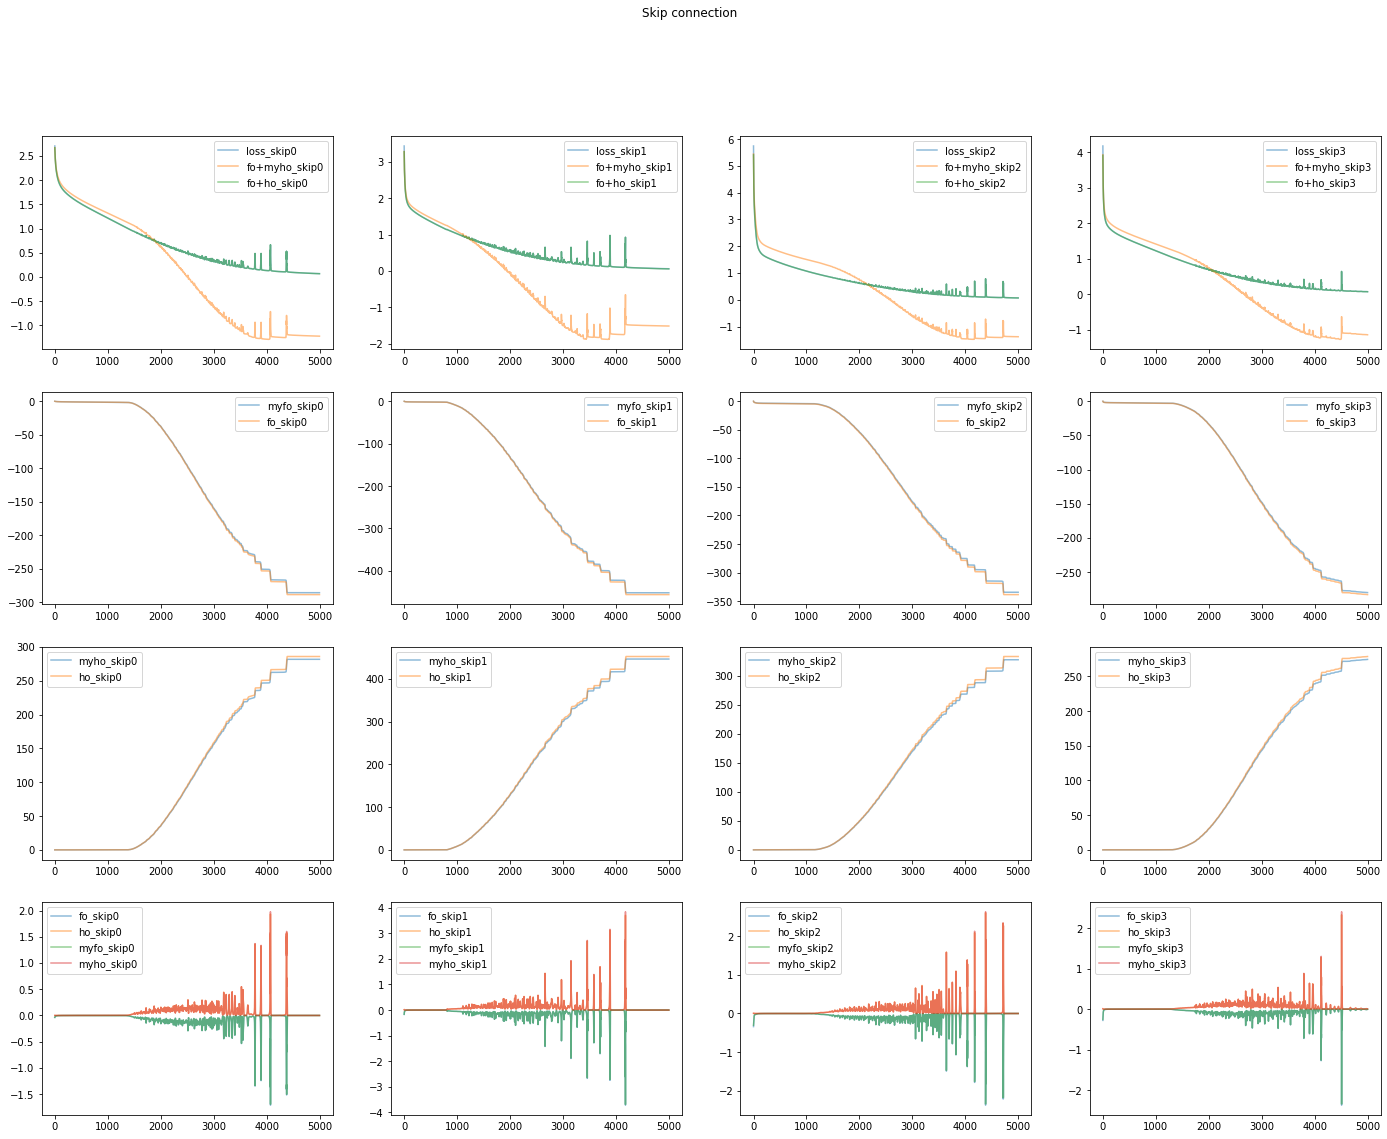

In [8]:
plot_all("data1111/*", nframes=5000, title="Skip connection")

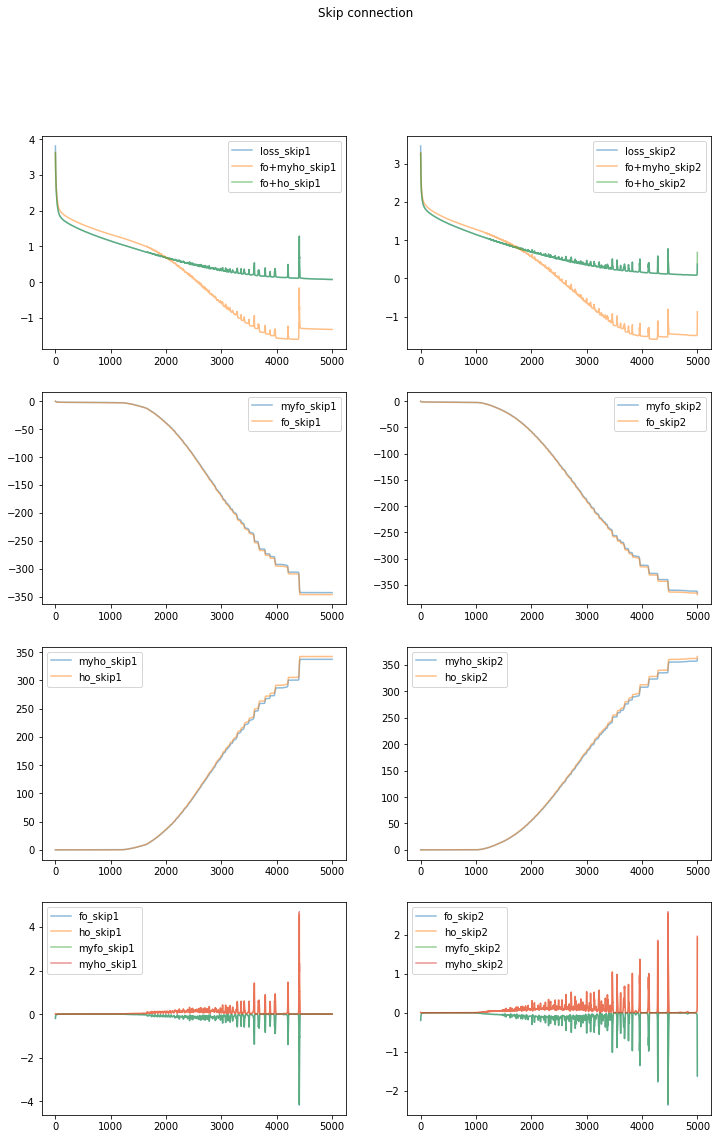

In [7]:
plot_all("data1111_pre-skip/*", nframes=5000, title="Skip connection")